<span style="color:Orange;font-size:50px;"><strong>In this section we train a linear regression model to predict the exam scores</strong></span> 

<span style="color:black"><strong>   Author: Yehia Abdelaziz<strong></span>



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df=df.dropna()

In [5]:
X=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

# Preprocessing of data
# Transforming the categorical data and performing standardization on the numerical data

In [6]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

col_transformer = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features), 
        ("StandardScalar", num_transformer, num_features)
    ]
)

In [7]:
X = col_transformer.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ..., -0.14349105,
        -1.21185842,  0.02651641],
       [ 0.        ,  1.        ,  0.        , ..., -1.11576327,
         0.40903557,  0.99848016],
       [ 0.        ,  0.        ,  1.        , ...,  1.10657322,
         0.40903557,  0.99848016],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.69907518,
         1.21948257, -0.94544733],
       [ 1.        ,  0.        ,  0.        , ...,  1.10657322,
         0.40903557,  0.02651641],
       [ 0.        ,  0.        ,  1.        , ...,  1.31491727,
        -1.21185842,  0.99848016]])

In [8]:
X.shape

(6378, 40)

# Splitting data into training and testing

In [9]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (5102, 40)
y_train shape: (5102,)
X_test shape: (1276, 40)
y_test shape: (1276,)


# Function to calculate the error in the prediction

In [10]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2


# Model Training

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)


LinearRegression()

# Predicted exam scores

In [12]:
y_pred = model.predict(X_test)

# Evaluating the error in the predictions using the prediction function defined earlier for different error functions

In [20]:
'Mean absolute error: {}, Root mean square error: {}, R2_Score: {}'.format(evaluate(y_test,y_pred)[0],evaluate(y_test,y_pred)[1],evaluate(y_test,y_pred)[2])

'Mean absolute error: 0.48577096394984326, Root mean square error: 2.0422638506278927, R2_Score: 0.731594413587701'

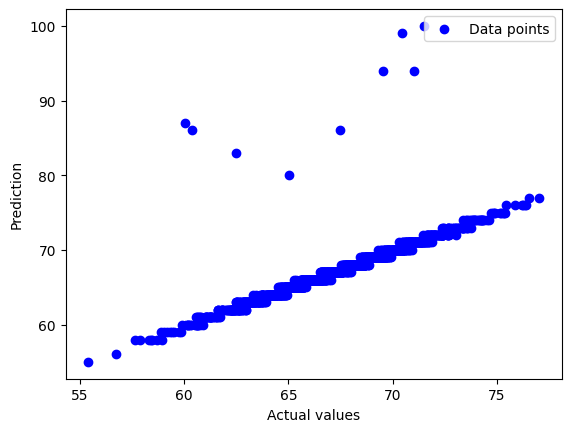

In [14]:
# Plotting the data and the regression line
plt.scatter(y_pred, y_test, color="blue", label="Data points")
#plt.plot(X, model.predict(X), color="red", label="Regression line")
plt.xlabel("Actual values")
plt.ylabel("Prediction")
plt.legend()
plt.show()


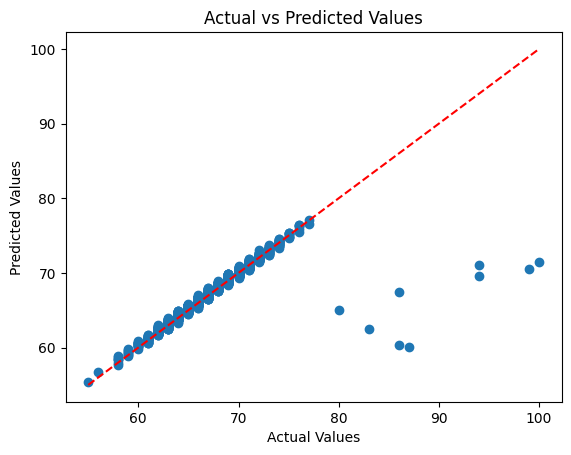

In [15]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()